In [1]:
import json, requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'http://localhost:9090/ianalysis'
response = requests.get(url)
if response.status_code == 200:
    data_string = response.json()
    data = json.loads(data_string)
    df = pd.DataFrame(data)
    print(f"success：{url}")

success：http://localhost:9090/ianalysis


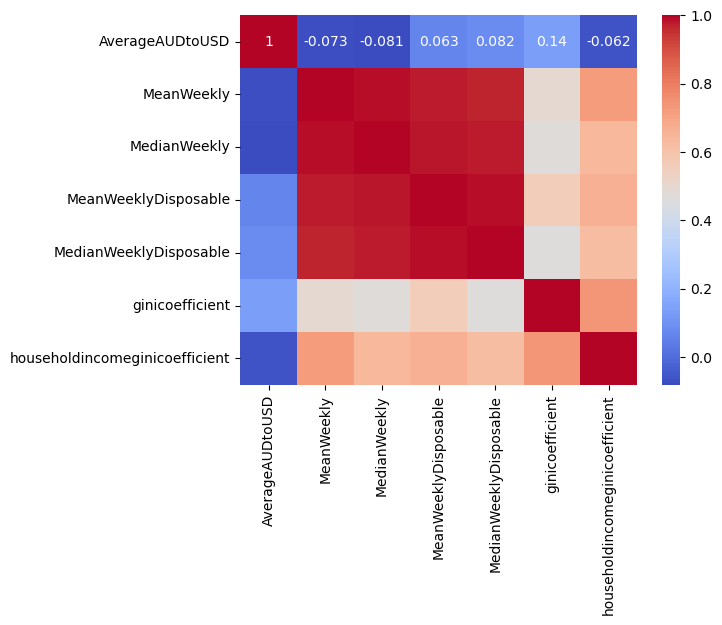

For 'AverageAUDtoUSD' , most_positive_correlated_column: ginicoefficient (r = 0.14)
For 'AverageAUDtoUSD' , most_negative_correlated_column: MedianWeekly (r = -0.08)


In [3]:
df_corr = df.drop('Year', axis=1)
correlation_matrix = df_corr.corr()
target_column = 'AverageAUDtoUSD'
corrs = correlation_matrix[target_column].drop(target_column)

most_positive_correlated_column = corrs.idxmax()
most_negative_correlated_column = corrs.idxmin()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()
print(f"For '{target_column}' , most_positive_correlated_column: {most_positive_correlated_column} (r = {corrs.max():.2f})")
print(f"For '{target_column}' , most_negative_correlated_column: {most_negative_correlated_column} (r = {corrs.min():.2f})")

In [7]:
df_corr = df_corr.drop('householdincomeginicoefficient', axis=1)
correlation_matrix = df_corr.corr()
target_column = 'ginicoefficient'
corrs = correlation_matrix[target_column].drop(target_column)
most_positive_correlated_column = corrs.idxmax()
most_negative_correlated_column = corrs.idxmin()
print(f"For '{target_column}' , most_positive_correlated_column: {most_positive_correlated_column} (r = {corrs.max():.2f})")
print(f"For '{target_column}' , most_negative_correlated_column: {most_negative_correlated_column} (r = {corrs.min():.2f})")

For 'ginicoefficient' , most_positive_correlated_column: MeanWeeklyDisposable (r = 0.56)
For 'ginicoefficient' , most_negative_correlated_column: AverageAUDtoUSD (r = 0.14)


In [12]:
df_new = df
def convert_to_start_date(year_str):
    start_year = int(year_str[:4])  
    start_date_str = f"{start_year}-01-01"  
    return pd.to_datetime(start_date_str)

df_new['start_datetime'] = df_new['Year'].astype(str).apply(convert_to_start_date)
df_new['ginicoefficient'] = pd.to_numeric(df_new['ginicoefficient'], errors='coerce')
df_new['householdincomeginicoefficient'] = pd.to_numeric(df_new['householdincomeginicoefficient'], errors='coerce')
df_new['MedianWeeklyDisposable'] = pd.to_numeric(df_new['MedianWeeklyDisposable'], errors='coerce')

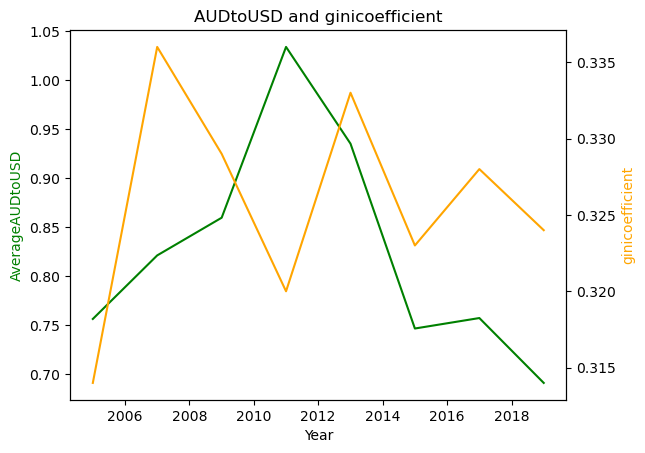

In [9]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 
ax1.plot(df_new['start_datetime'], df_new['AverageAUDtoUSD'], 'g-') 
ax2.plot(df_new['start_datetime'], df_new['ginicoefficient'], 'orange') 

ax1.set_xlabel('Year')
ax1.set_ylabel('AverageAUDtoUSD', color='g')
ax2.set_ylabel('ginicoefficient', color='orange')
plt.title('AUDtoUSD and ginicoefficient')

plt.show()

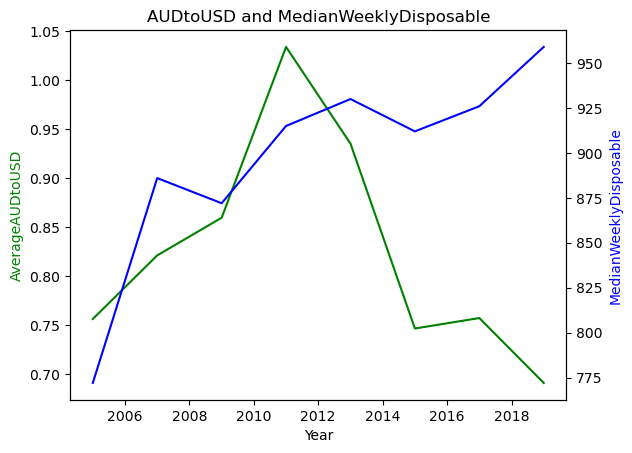

In [14]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 
ax1.plot(df_new['start_datetime'], df_new['AverageAUDtoUSD'], 'g-') 
ax2.plot(df_new['start_datetime'], df_new['MedianWeeklyDisposable'], 'blue') 

ax1.set_xlabel('Year')
ax1.set_ylabel('AverageAUDtoUSD', color='g')
ax2.set_ylabel('MedianWeeklyDisposable', color='blue')
plt.title('AUDtoUSD and MedianWeeklyDisposable')

plt.show()

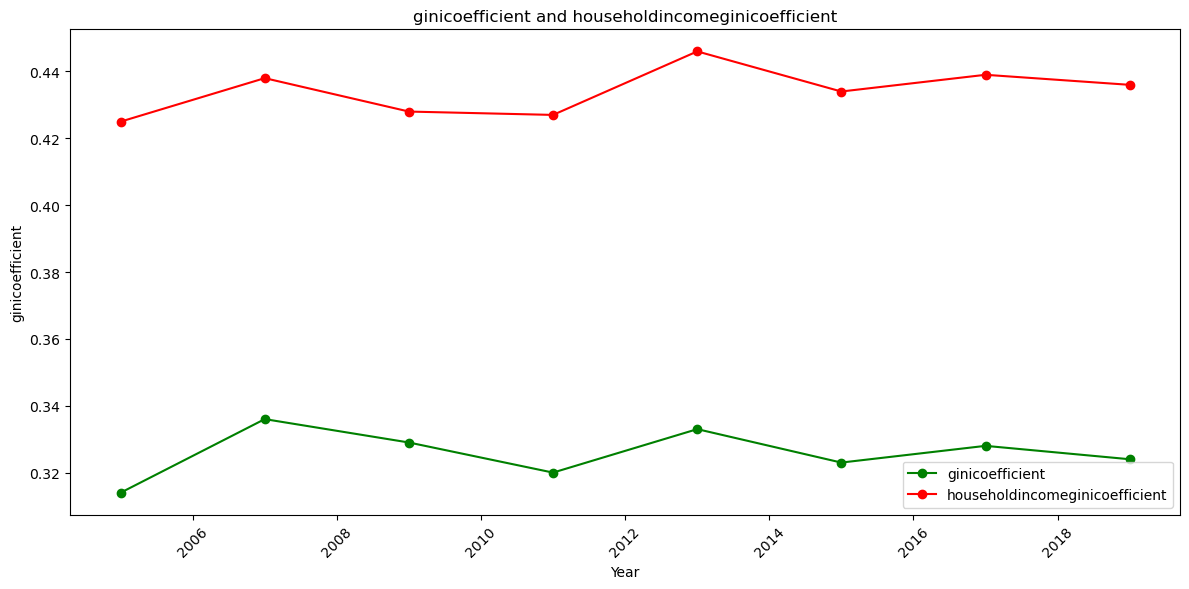

In [17]:
plt.figure(figsize=[12, 6]) 
plt.plot(df_new['start_datetime'], df_new['ginicoefficient'], label='ginicoefficient', color='green', marker='o')
plt.plot(df_new['start_datetime'], df_new['householdincomeginicoefficient'], label='householdincomeginicoefficient', color='red', marker='o')  # 绘制图表
plt.title('ginicoefficient and householdincomeginicoefficient') 
plt.xlabel('Year') 
plt.ylabel('ginicoefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()